In [1]:
# import packages

import pandas as pd
import numpy as np
import datetime 
import math as mat
import time 
from datetime import timedelta
import matplotlib.pyplot as plt
import re 

In [3]:
# Import the csv file
accre_df=pd.read_csv('Data/july-2017-thru-june-2018.txt',sep="|",nrows=1000000)


In [4]:
# see what the data looks like
accre_df.head()

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
0,15806649,15806649,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,WOODWARD_TCP-x-228324-x-228324-x-301-x-Multi_A...
1,15806664,15806664,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,WOODWARD_TCP-x-115174-x-115174-x-301-x-Multi_A...
2,15806670,15806670,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,WOODWARD_TCP-x-215607-x-215607-x-301-x-Multi_A...
3,15806671,15806671,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02T00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,WOODWARD_TCP-x-116214-x-116214-x-1701-x-Multi_...
4,15811617,15811617,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01T05:00:00,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_aa7c22e04f21


In [5]:
# check elapsed data
accre_df['Elapsed'].head(6)

0    1-01:05:21
1      23:51:47
2    1-01:59:51
3    1-08:02:20
4      00:00:10
5      00:03:18
Name: Elapsed, dtype: object


## Elapsed time is equal to difference between end and start time

# convert the start, end and elapsed time from str to datetime format to calculate job duration

In [6]:
accre_df['Submit']=pd.to_datetime(accre_df['Submit'])

In [7]:
accre_df['Start']=pd.to_datetime(accre_df['Start'])

In [8]:
accre_df['End']=pd.to_datetime(accre_df['End'])

# calculate Elaspsed time for jobs

In [9]:
# replace elapsed time column with the calculated elapsed time.
accre_df['Elapsed']=accre_df['End']-accre_df['Start']

In [10]:
accre_df.shape

(1000000, 25)

In [11]:
accre_df.head()

,JobID,JobIDRaw,Cluster,Partition,Account,Group,GID,User,UID,Submit,...,State,NNodes,NCPUS,ReqCPUS,ReqMem,ReqGRES,ReqTRES,Timelimit,NodeList,JobName
0,15806649,15806649,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1085,WOODWARD_TCP-x-228324-x-228324-x-301-x-Multi_A...
1,15806664,15806664,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1099,WOODWARD_TCP-x-115174-x-115174-x-301-x-Multi_A...
2,15806670,15806670,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp1126,WOODWARD_TCP-x-215607-x-215607-x-301-x-Multi_A...
3,15806671,15806671,accre,production,h_vuiis,h_vuiis,36052,masispider,NaN,2017-07-02 00:40:58,...,COMPLETED,1,2,2,12Gn,NaN,"cpu=2,mem=12G,node=1",9-04:00:00,vmp230,WOODWARD_TCP-x-116214-x-116214-x-1701-x-Multi_...
4,15811617,15811617,accre,production,cms_samtest,cms_samtest,59297,uscms010,NaN,2017-07-01 05:00:00,...,COMPLETED,1,1,1,4000Mn,NaN,"cpu=1,mem=4000M,node=1",2-00:00:00,vmp1242,bl_aa7c22e04f21


accre_df2.head()

In [12]:
# check data type of sumbit column
accre_df['Submit'].head()

0   2017-07-02 00:40:58
1   2017-07-02 00:40:58
2   2017-07-02 00:40:58
3   2017-07-02 00:40:58
4   2017-07-01 05:00:00
Name: Submit, dtype: datetime64[ns]

# check data type of Elapsed column

In [14]:
accre_df['Elapsed'].head()




0   1 days 01:05:21
1   0 days 23:51:47
2   1 days 01:59:51
3   1 days 08:02:20
4   0 days 00:00:10
Name: Elapsed, dtype: timedelta64[ns]

In [23]:
# keep only sumbit, user, jobidraw and elapsed time column
accre_select_df=accre_df.loc[:,['Submit','User','JobIDRaw','Elapsed']]
accre_select_df.head()


,Submit,User,JobIDRaw,Elapsed
0,2017-07-02 00:40:58,masispider,15806649,1 days 01:05:21
1,2017-07-02 00:40:58,masispider,15806664,0 days 23:51:47
2,2017-07-02 00:40:58,masispider,15806670,1 days 01:59:51
3,2017-07-02 00:40:58,masispider,15806671,1 days 08:02:20
4,2017-07-01 05:00:00,uscms010,15811617,0 days 00:00:10


# sort the the accre_select_df by Elapsed time and user name in ascending order.

In [34]:
accre_select_df=accre_select_df.sort_values(by=['Submit','User','Elapsed'],ascending=True)

In [35]:
accre_select_df.head()

,Submit,User,JobIDRaw,Elapsed
4,2017-07-01 05:00:00,uscms010,15811617,00:00:10
5,2017-07-01 05:00:01,autocms,15811618,00:03:18
6,2017-07-01 05:00:02,tuos,15811619,00:02:03
7,2017-07-01 05:00:22,uscms010,15811621,00:00:10
8,2017-07-01 05:01:01,autocms,15811624,00:04:47


In [36]:
accre_5_minutes= accre_select_df[accre_select_df.Elapsed<'0 days 00:05:00']

In [37]:
accre_5_minutes.head(10)

,Submit,User,JobIDRaw,Elapsed
4,2017-07-01 05:00:00,uscms010,15811617,00:00:10
5,2017-07-01 05:00:01,autocms,15811618,00:03:18
6,2017-07-01 05:00:02,tuos,15811619,00:02:03
7,2017-07-01 05:00:22,uscms010,15811621,00:00:10
8,2017-07-01 05:01:01,autocms,15811624,00:04:47
9,2017-07-01 05:01:02,tuos,15811625,00:03:12
31,2017-07-01 05:01:26,vuiiscci,15811649,00:00:00
33,2017-07-01 05:01:26,vuiiscci,15811651,00:00:00
34,2017-07-01 05:01:56,uscms010,15811654,00:02:00
35,2017-07-01 05:02:02,autocms,15811655,00:02:51


In [38]:
# drop the Elapsed time column

del(accre_5_minutes['Elapsed'])

In [39]:
accre_5_minutes.head()

,Submit,User,JobIDRaw
4,2017-07-01 05:00:00,uscms010,15811617
5,2017-07-01 05:00:01,autocms,15811618
6,2017-07-01 05:00:02,tuos,15811619
7,2017-07-01 05:00:22,uscms010,15811621
8,2017-07-01 05:01:01,autocms,15811624


# group less than 5 minutes jobs into 4 hours range

In [40]:
grouped_by_4h = accre_5_minutes.groupby('User').rolling('4h', on='Submit').JobIDRaw.count()

In [41]:
grouped_by_4h.head(10)

User      Submit             
albertme  2017-07-03 23:15:39    1.0
          2017-07-04 02:59:58    2.0
          2017-07-04 03:04:59    3.0
          2017-07-04 03:10:42    4.0
          2017-07-04 03:16:04    4.0
          2017-07-04 03:34:08    5.0
          2017-07-04 03:38:08    6.0
          2017-07-04 06:03:55    7.0
          2017-07-04 17:09:39    1.0
          2017-07-04 17:12:48    2.0
Name: JobIDRaw, dtype: float64

grouped_by_4h=pd.DataFrame(grouped_by_4h).reset_index


In [42]:
# maximum number of jobs the users run in 4 hour ranges
grouped_by_4h_500= grouped_by_4h.groupby('User').max()
grouped_by_4h_500.head()

User
albertme      7.0
anderkj2      9.0
annisj       20.0
arnoldjr      8.0
autocms     242.0
Name: JobIDRaw, dtype: float64

In [43]:
# users running more than 500 jobs in 4 hours ranges
grouped_by_4h_500=grouped_by_4h_500[grouped_by_4h_500>=500]
grouped_by_4h_500

User
bozhanng        604.0
brockc         1234.0
cakira         7683.0
cmsglidein     5541.0
deik            681.0
fletchs2       7670.0
khancm         2443.0
luchieac       1000.0
marlowb        2862.0
mercalnd       7613.0
msrc            955.0
ozgunka         571.0
schildjs       1109.0
schluedj       1005.0
scholzmb       1046.0
sivleyrm        678.0
sotocs         3697.0
teaguedo       2573.0
tierneje       1041.0
vuiiscci       1072.0
wangj36        1224.0
zhangdk       75611.0
Name: JobIDRaw, dtype: float64

In [ ]:
# bar plot for users running more than 500 short jobs within 24

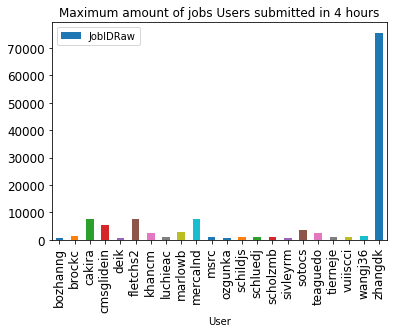

In [44]:
grouped_by_4h_500.plot.bar(title='Maximum amount of jobs Users submitted in 4 hours', legend=True,fontsize=12,figsize=(6,4))

# method 2 to find the  point where the users hit the 500th  jobs

In [45]:
accre_5_minutes['cum_count'] = accre_5_minutes.groupby(['User', pd.Grouper(freq='4H', key='Submit')]).cumcount()

C:\Users\fevty\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# cumulative counts of  jobs ran until a given time in 4 hour range

In [47]:
# see top 10 rows
accre_5_minutes.head(10)

,Submit,User,JobIDRaw,cum_count
4,2017-07-01 05:00:00,uscms010,15811617,0
5,2017-07-01 05:00:01,autocms,15811618,0
6,2017-07-01 05:00:02,tuos,15811619,0
7,2017-07-01 05:00:22,uscms010,15811621,1
8,2017-07-01 05:01:01,autocms,15811624,1
9,2017-07-01 05:01:02,tuos,15811625,1
31,2017-07-01 05:01:26,vuiiscci,15811649,0
33,2017-07-01 05:01:26,vuiiscci,15811651,1
34,2017-07-01 05:01:56,uscms010,15811654,2
35,2017-07-01 05:02:02,autocms,15811655,2


# total jobs each user run within 4 hours ranges

In [166]:
jobs_in_4h=accre_5_minutes[['User','JobID']].groupby('User').agg('count')
jobs_in_4h

,JobID
User,
albertme,21
anderkj2,9
annisj,20
arnoldjr,12
autocms,35786
barnekr1,25
bellcs1,5
beloinsb,1
bentonml,6


# users running more 500 jobs with in 4 hours range

In [48]:
# the point of time the users pass 500th jobs and keep adding them.
accre_5_minutes_500=accre_5_minutes[accre_5_minutes.cum_count>=499]

In [49]:
accre_5_minutes_500.head()

,Submit,User,JobIDRaw,cum_count
27713,2017-07-03 21:03:47,fletchs2,15845127,499
27714,2017-07-03 21:03:47,fletchs2,15845128,500
27715,2017-07-03 21:03:47,fletchs2,15845129,501
27716,2017-07-03 21:03:47,fletchs2,15845130,502
27717,2017-07-03 21:03:47,fletchs2,15845131,503


In [139]:
# check when Fletch2 exceeded 500th jobs
fletchs_2 =accre_5_minutes_500[accre_5_minutes_500.User =='fletchs2']

In [140]:
fletchs_2.head()

,Submit,User,JobIDRaw,JobID,cum_count
27713,2017-07-03 21:03:47,fletchs2,15845127,15845127,499
27714,2017-07-03 21:03:47,fletchs2,15845128,15845128,500
27715,2017-07-03 21:03:47,fletchs2,15845129,15845129,501
27716,2017-07-03 21:03:47,fletchs2,15845130,15845130,502
27717,2017-07-03 21:03:47,fletchs2,15845131,15845131,503


In [50]:
# maximum number of jobs the users run within 4 hour ranges
accre_5_minutes_500.groupby('User').max()

,Submit,JobIDRaw,cum_count
User,,,
bozhanng,2017-07-12 23:19:03,16131629,603
brockc,2017-07-21 15:30:31,16572675,841
cakira,2017-07-15 00:33:15,16305703,4592
cmsglidein,2017-07-28 13:17:48,16818357,5220
deik,2017-07-14 03:08:38,16229074,680
fletchs2,2017-07-15 02:06:51,16313302,4427
khancm,2017-07-13 19:54:33,16194253,2442
luchieac,2017-07-13 18:24:03,16188150,999
marlowb,2017-07-24 21:34:20,16672172,2377


# list the most frequent offenders

In [51]:
accre_500_occurence = accre_5_minutes_500[accre_5_minutes_500['cum_count']==500]

In [52]:
prob_offender_count=accre_500_occurence[['User', 'cum_count']].groupby('User').agg('count').sort_values(by ='cum_count', ascending = False)
prob_offender_count = prob_offender_count.reset_index()
prob_offender_count.columns = [['User','short_job_count']]

# number of times the offenders sumbitted too short 500 or more jobs in 4 hour range

In [200]:

prob_offender_count

,User,short_job_count
0,msrc,34
1,cmsglidein,16
2,zhangdk,16
3,fletchs2,8
4,cakira,6
5,brockc,6
6,teaguedo,6
7,mercalnd,5
8,sotocs,4
9,marlowb,4
